# CS 316 : Introduction to Deep Learning - Fall 2024
## Lab 04 : Linear Regression
### Dr. Abdul Samad

# Instructions

1. Make a copy of this notebook on google colab

2. Please rename your notebook as *Lab_4_aa1234.ipynb* before the final submission. Notebooks which do not follow appropriate naming convention will not be graded.

3. You have to submit this lab during the lab timings. You are allowed to submit till 11:59 PM on the day of your lab with a 30% penalty. No submissions will be accepted afterwards.

4. Use of AI is strictly prohibited. Anyone caught using Any AI tool during lab or while grading will be immediately reported to OCVS without any further discussion.

5. At the end of the lab, download the notebook and upload it on canvas as a file. Submitting link to notebook will not be accepted.

6. Each task has points assigned to it. Total Lab is of 100 points.

7. Use of for loops is strictly prohibited.

8. For every theoretical question, there is a separate cell given at the end. You have to write your answer there.

9. If you have any questions, please feel free to reach out to the course instructor or RA.

## Task Overview


So far we have studied about how input layers are connected to hidden neurons and then to output. But we haven't completely applied it on any dataset. We are going to do that in this lab today. Lab is pretty short but at the same time necessary for you as this will help you to understand the full cycle.

## Setup

In [1]:
# Importing the essentials
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import os
import random
import urllib.request
import pandas as pd
np.random.seed(42)

## [20 Points] Task 01 - Download Dataset

A suitable dataset is required in order to obtain a linear regression model with reasonable accuracy. There are numerous datasets available, and many of them can be found online. You can also download the dataset manually, but scripting its retrieval is more convenient and may save time.
We'll use the urllib.request package to download the dataset.

**Your task is to download the Boston Housing Dataset by completing the function `get__dataset`. using the `urlib.request.urlretrive(url,filename)` method.**
\
**Link to Dataset**: [https://raw.githubusercontent.com/sandeshkumar003/Dataset/main/Customer%20Purchasing%20Behaviors.csv](https://raw.githubusercontent.com/sandeshkumar003/Dataset/main/Customer%20Purchasing%20Behaviors.csv)

In [2]:
# TODO: Complete get_boston_customer_dataset
def get_dataset(filename):
    """
    Download the boston housing dataset.
    If the file already exists, don't download the data again.
    Add appropriate error handling as well.

    Args:
        filename (string): The path where you want to save the file.
    Return:
        bool : True, if you successfully downloaded the data. False,  if the file already exists.
    """
    # Write your code here.
    # BEGIN SOLUTION
    url = 'https://raw.githubusercontent.com/sandeshkumar003/Dataset/main/Customer%20Purchasing%20Behaviors.csv'
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)
        return True
    else:
        return False




    # END SOLUTION

In [3]:
# DO NOT EDIT
# TEST CODE FOR CHECKING THE FUNCTION.
if not os.path.isdir("datasets"):
  os.mkdir("datasets")
customer_csv = os.path.join("datasets", "Customer.csv")
if os.path.exists(customer_csv):
  assert get_dataset(customer_csv) == False
else:
  assert get_dataset(customer_csv) == True

## Exploratory Data Analysis

After downloading the csv file, let's observe the data and try to understand what it means.

In [50]:
# DO NOT EDIT
# Load the dataset
customer_dataset = pd.read_csv(customer_csv)
# View the top rows of the dataset
customer_dataset.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


Most of the variables are unlikely to have a significant impact on Chance of admit. To avoid dealing with irrelevant columns, try finding out which variables have strong correlation with data. It has been done in below given code. No need to do it for now.

<ipython-input-51-15c4876c606d>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


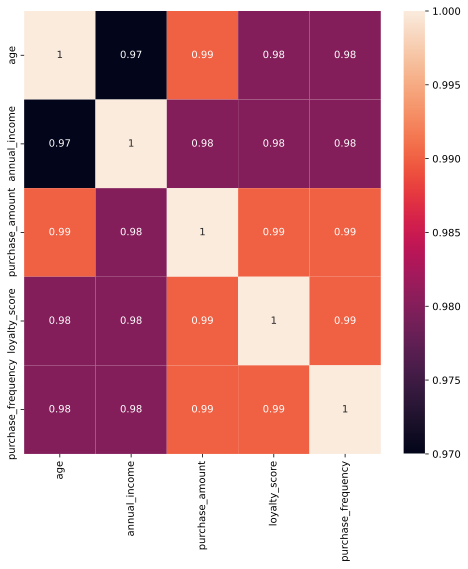

In [51]:
# DO NOT EDIT
%matplotlib inline
display.set_matplotlib_formats('svg')
plt.figure(figsize=(8,8))
#Drop user_id,region
customer_dataset=customer_dataset.drop(['user_id','region'],axis=1)
correlation_matrix = customer_dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

According to the heatmap all variables are affecting the output. In some cases, there might be few which affect the output. Consequently, we will keep all columns.

In [52]:
# DO NOT EDIT
# Extract only the relevant columns. X: Input, Y: Output
# iloc specifies the position of the column we want to select. :, part means all rows. ,-1 means last column
output = customer_dataset.iloc[:,-1]
print(customer_dataset.columns)
Y = np.array(output.values).reshape(-1,1)
X = np.array(customer_dataset[['age','annual_income','purchase_amount','loyalty_score']].values)
print(Y.shape,X.shape)

Index(['age', 'annual_income', 'purchase_amount', 'loyalty_score',
       'purchase_frequency'],
      dtype='object')
(238, 1) (238, 4)


In [53]:
# DO NOT EDIT
ones = np.ones(shape=(len(X),1))
X_with_bias = np.concatenate((X,ones),axis=1)
print(X_with_bias.shape)

(238, 5)


## [20 Points] Task 02 - Train Test Split

To determine whether regression is effective, we can split our data into a training and test set and compare performance. Before splitting data, make sure to shuffle it because data is sometimes arranged in a specific order, such as all low-end houses first. If the data is not properly shuffled, it may fail to learn patterns. So, to avoid bias in your training data, shuffle it before splitting.

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=13ZwKJ0RyGZo76LI9NBVVRQc83T5moGcq)

</center>








**Your task is to split the dataset into training and test dataset by completing the function `train_test_split(inputs,outputs,test_size,seed)`**

**Important note on seed**: Reproducability is extremely important. Sometimes, you might find a good seed for a split. When dealing with random shuffling, you will get different results everytime you run. You can set a global seed by using `np.random.seed(42)` however that sets the global seed. It is useful over here to not change the global seed here, since if you want to reproduce the same result, you will have to run the entire code again. The solution to this problem is that you create a generator with a specific seed and use that for generation. [You can find more about setting seeds here](https://builtin.com/data-science/numpy-random-seed)

Process:

Create index using np.arange

Shuffle the dataset using rng.shuffle

Split the dataset into train, test

In [ ]:
rng = np.random.default_rng(0)

indices = np.arange(10)
print(indices)

print(type(indices))
rng.shuffle(indices)
print(indices)
print(type(indices))
train_indices = indices[:7]
test_indices = indices[7:]

x_input = np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])
y_output = np.array([3,4,5,6,7,8,9,10,11,12])
split = 0.5

print(x_input[train_indices])
print(y_output[train_indices])

print(x_input[test_indices])
print(y_output[test_indices])


[0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>
[4 6 2 7 3 5 9 0 8 1]
<class 'numpy.ndarray'>
[ 5.  7.  3.  8.  4.  6. 10.]
[ 7  9  5 10  6  8 12]
[1. 9. 2.]
[ 3 11  4]


In [54]:
# TODO: Complete train_test_split
def train_test_split(inputs,outputs,test_size,seed = 0):
    """
    Splits the data into training and test sets.
    Return 4 numpy arrays. X_train, X_test, Y_train, Y_test
    where training data is test_size proportion of data provided.

    Args:
        inputs [np.array] : numpy array of input data
        outputs [np.array]: numpy array of output labels
        test_size [float]: proportion of data to be used as test data. e.g. 0.2 means 20% of data is used for test data.
        seed [int]: A seed to create random number generator. (For reproducability)
    """
    rng = np.random.default_rng(seed)
    assert(len(inputs) == len(outputs))
    assert(test_size <= 1.0)
    assert(test_size >= 0.0)
    num_samples = len(inputs)
    num_train = int(num_samples * (1.0 - test_size))
    # Write your code here
    # BEGIN SOLUTION
    indices = np.arange(num_samples)
    rng.shuffle(indices)
    train_indices = indices[:num_train]
    test_indices = indices[num_train:]


    X_train = inputs[train_indices]
    X_test = inputs[test_indices]
    Y_train = outputs[train_indices]
    Y_test = outputs[test_indices]

    # END SOLUTION
    return X_train, X_test, Y_train, Y_test

In [55]:
# DO NOT EDIT
# TEST CODE FOR CHECKING THE FUNCTION.
x_input = np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])
y_output = np.array([3,4,5,6,7,8,9,10,11,12])
seed = 0
split = 0.5
x_train,x_test,y_train,y_test = train_test_split(x_input,y_output,split,seed)
print(f'x_train: {x_train}, x_test: {x_test}, y_train: {y_train}, y_test: {y_test}')
assert np.allclose(x_train,np.array([5.0,7.0,3.0,8.0,4.0]))
assert np.allclose(x_test,np.array([6.0,10.0,1.0,9.0,2.0]))
assert np.allclose(y_train,np.array([ 7,  9,  5, 10,  6]))
assert np.allclose(y_test,np.array([8,12,3,11,4]))

x_train: [5. 7. 3. 8. 4.], x_test: [ 6. 10.  1.  9.  2.], y_train: [ 7  9  5 10  6], y_test: [ 8 12  3 11  4]


To understand how we can use regression for this dataset have a look at these set of equations you would have used previously.


# RELU Activation Function

In [56]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  # TODO write code to implement the ReLU and compute the activation at the
  # hidden unit from the preactivation
  # activation = np.clip(preactivation,a_min=0,a_max=None)
  # also doable with np.where function
  activation=np.where(preactivation>=0,preactivation,0)
  return activation

def ReLU_Derivative(x):
  return np.where(x > 0, 1, 0)

## [20 Points] Task 03 - Linear Regression Model



Before we perform linear regression, we must define our model, relating its inputs and parameters to its outputs. Recall that to calculate the output of the linear model, we simply take the matrix-vector dot product of the input features $\mathbf{x}$ and the model weights ($\mathbf{\theta_1}$), and add the offset (also called bias or $\theta_0$) to each example.

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=19-kWCQngg6JAylKduDaXr3jEW2k-dCYt)

</center>

For your lab, you will be building a neural network with 2 hidden layers each with 2 neurons.

Initialized weights and biases:

weights1 should be random values of size (input_size,hidden_size1)

weights2 should be random values of size (hidden_size1,hidden_size2)

bias1 should be random values of size (1,hidden_size1)

bias2 should be random values of size (1,hidden_size2)




**In this task you are required to initialse the model weights and bias (thetas) by implementing the function `initialise_model`.**

In [ ]:
a = np.random.randn(3,2)
print(a)

[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]]


In [57]:
# TODO: Complete initialise_model
def initialise_model(input_size,hidden_size1,hidden_size2):
    """
  Initializes weights and biases for a neural network.

  Args:
    input_size: Size of the input layer
    hidden_size1: Size of the first hidden layer
    hidden_size2: Size of the second hidden layer

  Returns:

  """

    # Write your code here.
    # BEGIN SOLUTION
    weights1 = np.random.randn(input_size,hidden_size1)
    weights2 = np.random.randn(hidden_size1,hidden_size2)

    bias1 = np.random.randn(1,hidden_size1)
    bias2 = np.random.randn(1,hidden_size2)

    # END SOLUTION
    return weights1,bias1,weights2,bias2


## [20 Points] Task 04 - Linear Output



When going forward, convention for multiplication is to multiple x with weights and then add bias. Complete the below given code to do that.

Function Returns:

linear output of the model
        
layer1 [np.array]: Output of the first hidden layer

layer2 [np.array]: Output of the second hidden layer

In [58]:
#TODO: Complete forward
def forward(x,weights1,bias1,weights2,bias2):
    """
    Returns the linear output of the model
    Args:
        X [np.array]: Input
        w [np.array]: Model Weights
        b [np.scalar]: Model Bias

    """
    # Write your code here
    # BEGIN SOLUTION
    layer1 = ReLU(np.dot(x, weights1) + bias1)
    output = np.dot(layer1, weights2) + bias2

    # END SOLUTION
    return layer1, output

## Evaluation

Mean Squared error is defined as

$$\text{MSE} = \dfrac{1}{n}\sum\limits_{i=1}^{n}(y_i-\hat{y}_i)^2$$

where $y_i$ is your actual value and $\hat{y}_i$ is the predicted value. You have already completed this in previous lab.

In [59]:
def mean_squared_error(y_actual,y_prediction):
    """
    Returns mean squared error using prediction and actual data
    Args:
        y_actual [np.array]     : Actual output vector
        y_prediction [np.array] : Predicted output vector
    """
    #print(y_actual,y_prediction)
    return np.mean(np.square(y_actual - y_prediction))

## Gradient Descent



**This has been calculated for you. We will study more about Gradient Descent later in the course.**

In [60]:
def gradient_descent(X,y,output,weights1,weights2,bias1,bias2,hidden_layer1):
    """
    Calculates gradients for the weights and biases using backpropagation with ReLU activation.

  Args:
    X: Input data (numpy array)
    y: Target labels (numpy array)
    output: Output of the neural network (numpy array)
    weights1: Weights for the first hidden layer (numpy array)
    weights2: Weights for the second hidden layer (numpy array)
    bias1: Biases for the first hidden layer (numpy array)
    bias2: Biases for the second hidden layer (numpy array)

  Returns:
    gradients for weights and biases
  """
    delta_output = output - y

    # Calculate the error for the second hidden layer
    print(delta_output.shape,weights2.shape,output.shape)
    delta_hidden_2 = np.dot(delta_output, weights2.T) * ReLU_Derivative(output)

    # Calculate the error for the first hidden layer
    delta_hidden_1 = np.dot(delta_hidden_2, weights1.T) * ReLU_Derivative(hidden_layer1)

    # Calculate gradients
    d_weights1 = np.dot(X.T, delta_hidden_1)
    d_weights2 = np.dot(hidden_layer1.T, delta_output)
    d_bias1 = np.sum(delta_hidden_1, axis=0)
    d_bias2 = np.sum(delta_output, axis=0)
    return d_weights1,d_weights2,d_bias1,d_bias2

## [20 points] Task 05 - Main Loop

Now that we have all of the parts in place, we are ready to **implement the main training loop.**

In each iteration, we will use the entire batch of training examples,
and pass them through our model to obtain a set of predictions.
After calculating the loss, we initiate the backwards pass through the network,
storing the gradients with respect to each parameter.
Finally, we will use the gradient descent optimization algorithm
to update the model parameters.

In summary, we will execute the following loop:

* Split dataset (already completed)
* Initialize parameters $(\mathbf{w}, b)$ (thetas) (complete this)
* Repeat until done
    * Compute y_hat using forward function
    * Compute loss
    * Compute gradient descent
    * Update parameters $(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$ (already completed)

In each *epoch*, we will iterate through the entire dataset once
passing through every example in the training dataset. The number of epochs `num_epochs` and the learning rate `lr` are both hyperparameters.





**In this task, you have to implement the linear regression by completing the function `main`**.

In [61]:
#TODO: Complete the function main
def main(X,y,num_epochs,lr):
    """
    Returns the final model weight and bias. Also, plots a graph of the num_epochs vs mean squared error.
    Args:
        X [np.array]: Inputs
        y [np.array]: Outputs
        num_epochs [int]: Number of epochs
        lr [floar]: Learning Rate
    """
    # Split the data into train & test dataset. Split should 0.2 and seed should be equal to 0
    X_train,X_test,Y_train,Y_test = train_test_split(X,y,0.2,0)
    hidden_size1=4
    hidden_size2=4
    # Initialize Weights
    #Begin Solution
    weights1,bias1,weights2,bias2 = initialise_model(X_train.shape[1],hidden_size1,hidden_size2)
    #End Solution
    # Initialise empty L list
    L = []
    # Main Loop
    for epoch in range(num_epochs+1):
        # Write your code here


        # BEGIN SOLUTION

        # Compute the linear output using the training data
        hidden_layer1,output = forward(X_train,weights1,bias1,weights2,bias2)



        # Compute the loss on the training output
        loss = mean_squared_error(Y_train,output)



        # Compute d_weights, d_bias using Gradient descent
        d_weights1,d_weights2,d_bias1,d_bias2 = gradient_descent(X_train,Y_train,output,weights1,weights2,bias1,bias2,hidden_layer1)



        # END SOLUTION.
        L.append(loss)
        # Update w,b
        weights1 -= lr*d_weights1
        bias1 -= lr*d_bias1
        weights2 -= lr*d_weights2
        bias2 -= lr*d_bias2
    # Plot
    plt.plot([epoch for epoch in range(num_epochs+1)],L)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Loss')
    plt.title('Epochs vs Mean Squared Loss')
    plt.show()
    return weights1,bias1

(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)
(190, 4) (4, 4) (190, 4)


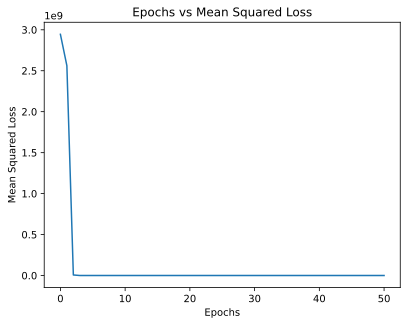

The final values are w: [[ 7.38466580e-01  1.71368281e-01 -1.15648282e-01 -6.57810469e+06]
 [-1.47852199e+00 -7.19844208e-01 -4.60638771e-01 -9.67128856e+09]
 [ 3.43618290e-01 -1.76304016e+00  3.24083969e-01 -7.35868328e+07]
 [-6.76922000e-01  6.11676289e-01  1.03099952e+00 -1.16223547e+06]], b: [[-3.58260391e-02  1.56464366e+00 -2.61974510e+00 -1.60808101e+05]]


In [63]:
# DO NOT EDIT
# TEST CODE FOR CHECKING THE FUNCTION.
w_act, b_act = main(X,Y,50,0.005)
print(f'The final values are w: {w_act}, b: {b_act}')